---
title: "Predictive Modeling of Patient Status in Primary Biliary Cirrhosis"
author: "Sherry Thomas"
format:
  html:
    theme: theme.scss
    toc: true
    html-math-method: katex
---

## Introduction and Dataset Overview

![Micrograph of PBC showing bile duct inflammation and injury, H&E stain](https://upload.wikimedia.org/wikipedia/commons/f/fa/Primary_biliary_cirrhosis_intermed_mag_much_cropping.jpg)

### Introduction

Cirrhosis stands as a severe consequence of liver diseases, where extensive scarring compromises liver function. The dataset at hand originates from the Mayo Clinic's trial addressing primary biliary cirrhosis (PBC) during 1974-1984. This collection of data encompasses crucial insights gleaned from 424 PBC patients, marking a pivotal endeavor in understanding the clinical landscape of this condition.

The dataset, meticulously gathered as part of a randomized placebo-controlled trial involving D-penicillamine, presents a comprehensive array of covariates. Each entry comprises fundamental patient attributes, ranging from clinical measurements to key indicators of liver health.

### Objective

The primary aim of this notebook is to harness machine learning methodologies to predict the status of PBC patients based on a diverse set of features. The 'Status' variable, delineated as C (censored), CL (censored due to liver tx), or D (death), serves as the focal point for predictive modeling. Leveraging the patient-specific attributes provided, the goal is to construct robust predictive models capable of discerning and forecasting patient outcomes within the scope of the study period.

### Dataset Overview

1. **Size:** The dataset contains information on 424 PBC patients, amalgamating both trial participants and supplementary cases with recorded measurements.
2. **Features:** Comprising 19 attributes encompassing a spectrum of patient-related variables, including demographic data, clinical measurements, and indicators of liver health.
3. **Context:** The features encapsulate critical facets of patient health, such as age, sex, presence of specific symptoms (ascites, hepatomegaly, spiders, edema), laboratory test results (bilirubin, cholesterol, albumin, copper, alkaline phosphatase, SGOT, triglycerides, platelets, prothrombin), and histologic staging of the disease.

Throughout this notebook, we embark on a journey through data exploration, preprocessing, model selection, and evaluation, culminating in the development of predictive models aimed at discerning and forecasting the status of PBC patients.

Let's delve into the intricate realm of predictive modeling in the context of primary biliary cirrhosis, unraveling insights and patterns within this comprehensive dataset.

## Data Exploration

### Dataset Snapshot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('datasets/dataset.csv', index_col='ID')
test_df = pd.read_csv('datasets/test.csv', index_col='id')
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


The initial entries of the dataset, as revealed by the `train.head()` command, offer a glimpse into the fundamental attributes and features characterizing the primary biliary cirrhosis (PBC) dataset. These entries encompass a diverse range of patient-related information, providing crucial insights into the condition and status of the individuals under study.

**Attributes Overview:**

1. **ID:** A unique identifier assigned to each patient within the dataset.
2. **N_Days:** The number of days between registration and the earlier occurrence of death, liver transplantation, or the study analysis time in July 1986.
3. **Status:** Categorization of the patient's status denoted as C (censored), CL (censored due to liver tx), or D (death).
4. **Drug:** Indicates the type of drug administered to the patient, specifying either D-penicillamine or Placebo.
5. **Age:** Age of the patient represented in days.
6. **Sex:** Gender classification denoted as M (male) or F (female).
7. **Ascites:** Presence or absence of ascites, indicated by Y (Yes) or N (No), respectively.
8. **Hepatomegaly:** Identification of hepatomegaly, denoted by Y (Yes) or N (No).
9. **Spiders:** Presence or absence of spiders, indicating Y (Yes) or N (No), respectively.
10. **Edema:** Details the presence and management of edema, categorized as S (edema present without diuretics, or edema resolved by diuretics), Y (edema despite diuretic therapy), or N (no edema and no diuretic therapy for edema).
11. **Bilirubin:** Serum bilirubin levels measured in mg/dl.
12. **Cholesterol:** Serum cholesterol levels measured in mg/dl.
13. **Albumin:** Albumin levels in gm/dl.
14. **Copper:** Urine copper levels recorded in ug/day.
15. **Alk_Phos:** Alkaline phosphatase levels in U/liter.
16. **SGOT:** SGOT (Serum Glutamic Oxaloacetic Transaminase) levels measured in U/ml.
17. **Tryglicerides:** Triglyceride levels measured in mg/dl.
18. **Platelets:** Platelet count per cubic ml/1000.
19. **Prothrombin:** Prothrombin time measured in seconds (s).
20. **Stage:** Histologic stage of the disease categorized as 1, 2, 3, or 4.

This snapshot serves as a foundational view of the dataset, highlighting the diverse array of attributes and their corresponding values that will be further explored, analyzed, and utilized in the predictive modeling and analysis undertaken in this notebook.

### Dataset Information Summary

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage          

The output from `train.info()` furnishes essential insights into the structure and composition of the primary biliary cirrhosis (PBC) dataset, providing a comprehensive understanding of the data types, non-null counts, and overall characteristics of the dataset's columns.

**Key Observations:**

1. **Total Entries:** The dataset comprises 418 entries or records, each representing an individual patient case, spanning a range from 0 to 417.

2. **Columns and Non-Null Counts:** The dataset incorporates 19 columns, each delineating a specific attribute. Notably, several columns showcase discrepancies in non-null counts, indicating missing or null values within the dataset.

   - **Categorical Variables:** Columns such as 'Drug,' 'Ascites,' 'Hepatomegaly,' 'Spiders,' 'Edema,' and 'Status' are represented as object data types, signifying categorical information regarding medications, symptoms, and patient status. Among these, 'Drug,' 'Ascites,' 'Hepatomegaly,' and 'Spiders' exhibit missing values.
   
   - **Numerical Variables:** The dataset also contains numerical variables denoted by float64 and int64 data types, encompassing clinical measurements and patient-specific information such as age, laboratory test results, and disease stage. Notably, columns like 'Cholesterol,' 'Copper,' 'Alk_Phos,' 'SGOT,' 'Tryglicerides,' 'Platelets,' 'Prothrombin,' and 'Stage' display missing values.

3. **Memory Usage:** The dataset's memory usage is estimated to be approximately 65.4 KB, reflecting the computational footprint of the dataset in memory.

**Data Completeness and Challenges:**

- The presence of missing values across various columns warrants attention and necessitates strategies for data imputation or handling missing data during the preprocessing phase.

This information overview lays the groundwork for comprehensive data exploration, cleaning, and preprocessing steps essential for building robust predictive models in the subsequent sections of this analysis.

### Statistical Summary of the Dataset

In [3]:
data.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


The `train.describe()` output provides a comprehensive statistical overview of the numerical columns present in the PBC dataset, offering insights into the central tendencies, dispersion, and distribution of various clinical measurements and patient-specific attributes.

**Key Observations:**

1. **Count:** The count for each column signifies the number of non-null entries available for the corresponding attribute. Discrepancies in counts indicate the presence of missing or null values across different features.

2. **Central Tendencies:**

   - **N_Days (Number of Days):** The average time between registration and events (death, transplantation, or study analysis) is approximately 1917.78 days, with a wide range from 41 days to 4795 days.
   
   - **Age:** The average age in days stands at approximately 18533.35, with a minimum of 9598 days and a maximum of 28650 days, showcasing the wide age range of patients included in the dataset.
   
   - **Clinical Measurements:** Various clinical measurements like bilirubin, cholesterol, albumin, copper, alkaline phosphatase (Alk_Phos), SGOT, triglycerides, platelets, prothrombin, and disease stage (Stage) display different mean values and ranges, indicating diversity in patient conditions and responses to treatment.
   
3. **Dispersion:**

   - **Standard Deviation:** The standard deviation illustrates the dispersion or spread of values around the mean for each numerical attribute. Higher standard deviations, as observed in bilirubin, cholesterol, Alk_Phos, SGOT, and others, suggest greater variability in these measurements across patients.
   
4. **Minimum, Maximum, and Quartiles:**

   - The minimum and maximum values signify the range of values observed within each attribute.
   
   - Quartiles (25%, 50%, and 75%) offer insights into the distribution of values, providing information on the spread of data and potential presence of outliers within each variable.

**Data Interpretation:**

- The wide range of values across different clinical measurements and patient-specific attributes underlines the heterogeneity of patient conditions within the PBC dataset.
  
- The presence of missing values, particularly notable in columns like 'Cholesterol,' 'Copper,' 'Tryglicerides,' 'Platelets,' and 'Stage,' indicates the necessity for appropriate handling of missing data during data preprocessing and analysis stages.

This statistical summary lays the foundation for a deeper exploration and analysis of the dataset, guiding further preprocessing, feature engineering, and model development in subsequent sections of the analysis.

### Pie Plot Analysis

In [4]:
cat_cols = data.drop(["Status"], axis=1).select_dtypes(include='object').columns.tolist()
num_cols = data.select_dtypes(exclude='object').columns.tolist()

In [5]:
def plot_target(data: pd.DataFrame, col: str, title: str, pie_colors: list, test_df: pd.DataFrame = pd.DataFrame()) -> None:
    if not test_df.empty:
        fig, axes = plt.subplots(1, 4, figsize=(20, 6), gridspec_kw={'width_ratios': [2, 1, 2, 1]})
        
        for i, data in enumerate([data, test_df]):
            textprops={'fontsize': 12, 'weight': 'bold', 'color': 'black'}
            ax = axes[i * 2]
            
            ax.pie(data[col].value_counts().to_list(),
                colors=pie_colors,
                labels=data[col].value_counts().index.to_list(),
                autopct='%1.f%%',
                explode=([.05] * data[col].nunique()),
                pctdistance=0.5,
                wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
                textprops=textprops)

            sns.countplot(x=col, data=data, palette='pastel6', hue=col, order=data[col].value_counts().to_dict().keys(), ax=axes[i * 2 + 1])

            for p, count in enumerate(data[col].value_counts().to_dict().values(), 0):
                axes[i * 2 + 1].text(p - 0.1, count + (np.sqrt(count)), count, color='black', fontsize=13)

            plt.setp(axes[i * 2 + 1].get_xticklabels(), fontweight='bold')
            plt.yticks([], ax=axes[i * 2 + 1])
            axes[i * 2 + 1].set_ylabel('')
            axes[i * 2 + 1].set_xlabel('')
            # axes[i * 2 + 1].get_legend().remove()
            # plt.box(False, ax=axes[i * 2 + 1])

            axes[i * 2].set_title(f'Distribution in {"Train" if i == 0 else "Test"} Set', fontsize=16, fontweight='bold')

        fig.suptitle(x=0.5, y=1.05, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.show()

    else:
        fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

        textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
        ax[0].pie(data[col].value_counts().to_list(),
                colors=pie_colors,
                labels=data[col].value_counts().index.to_list(),
                autopct='%1.f%%', 
                explode=([.05]*data[col].nunique()),
                pctdistance=0.5,
                wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
                textprops=textprops)

        sns.countplot(x = col, data=data, palette = "pastel6", hue=col, order=data[col].value_counts().to_dict().keys())
        for p, count in enumerate(data[col].value_counts().to_dict().values(),0):
            ax[1].text(p-0.1, count+(np.sqrt(count)), count, color='black', fontsize=13)
        plt.setp(ax[1].get_xticklabels(), fontweight="bold")
        plt.yticks([])
        plt.box()
        fig.suptitle(x=0.56, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.show()

#### Status Distribution

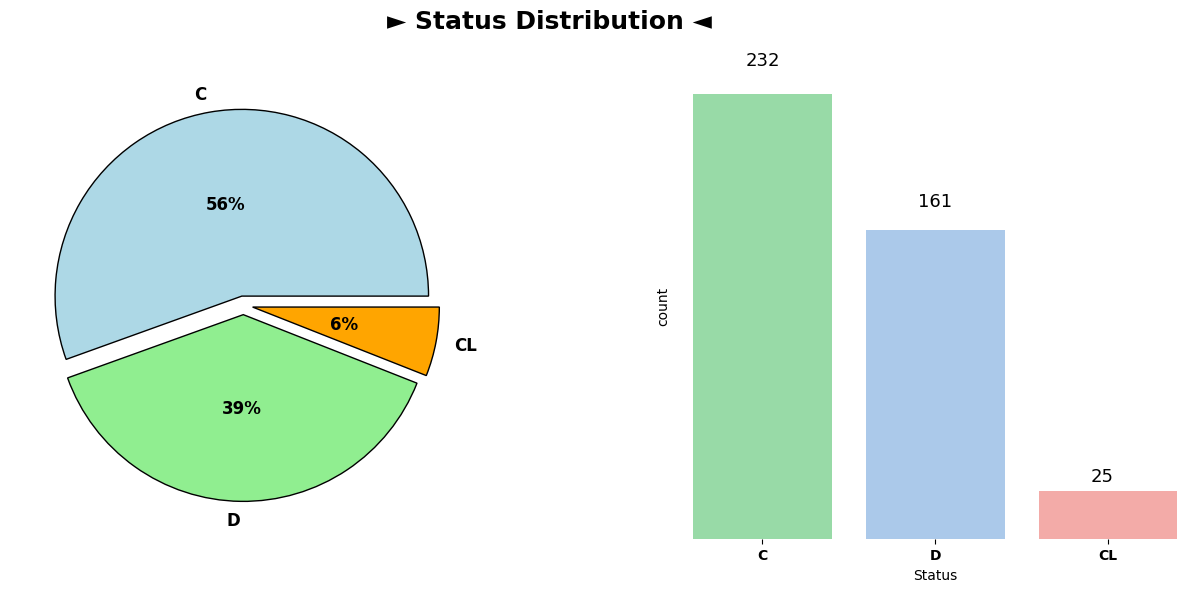

In [6]:
plot_target(data,
            col='Status', 
            title='Status', 
            pie_colors=['lightblue', 'lightgreen', 'orange'])

The pie chart representing the distribution of patient statuses ('C', 'D', 'CL') revealed the following ratios:

- **C (censored):** 56%
- **D (death):** 39%
- **CL (censored due to liver tx):** 6%

This distribution indicates that a majority of the patients (56%) had a status of 'C' (censored), followed by 39% classified as 'D' (death) and a smaller portion, 6%, categorized as 'CL' (censored due to liver tx). This insight provides an initial understanding of the imbalance in patient statuses within the dataset.

#### Categorical Variable Distributions (Train and Test Sets)

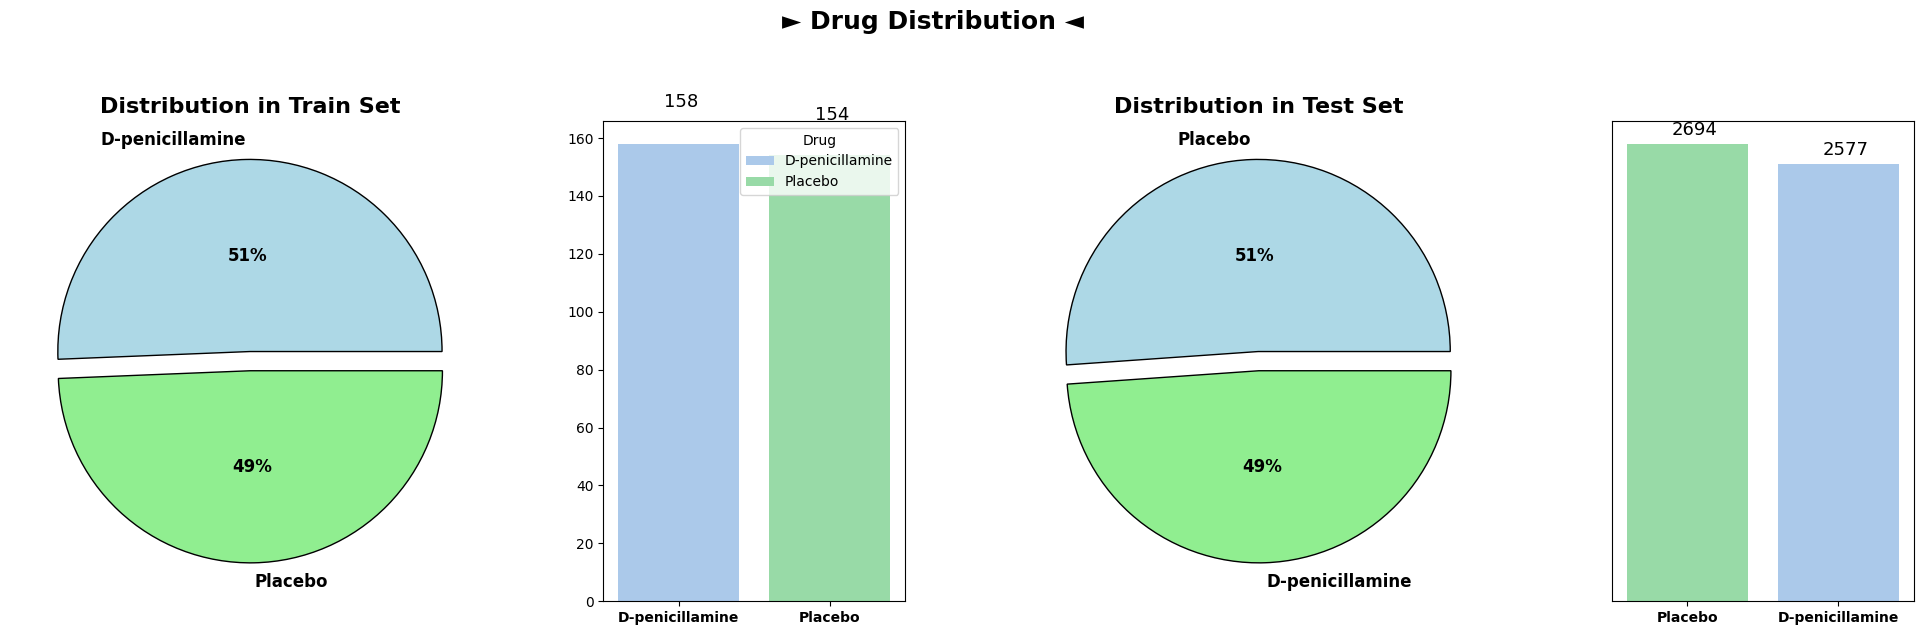

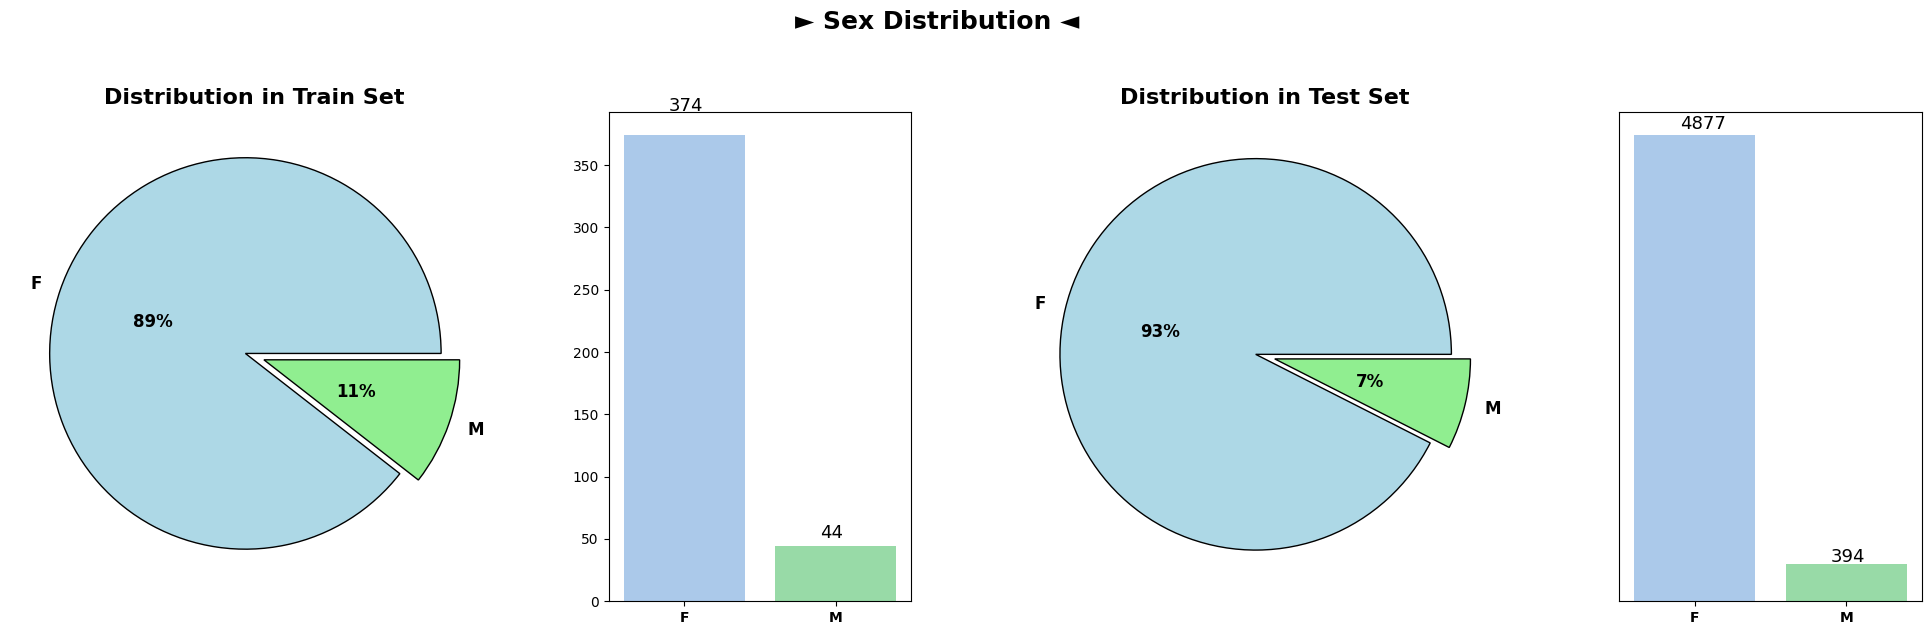

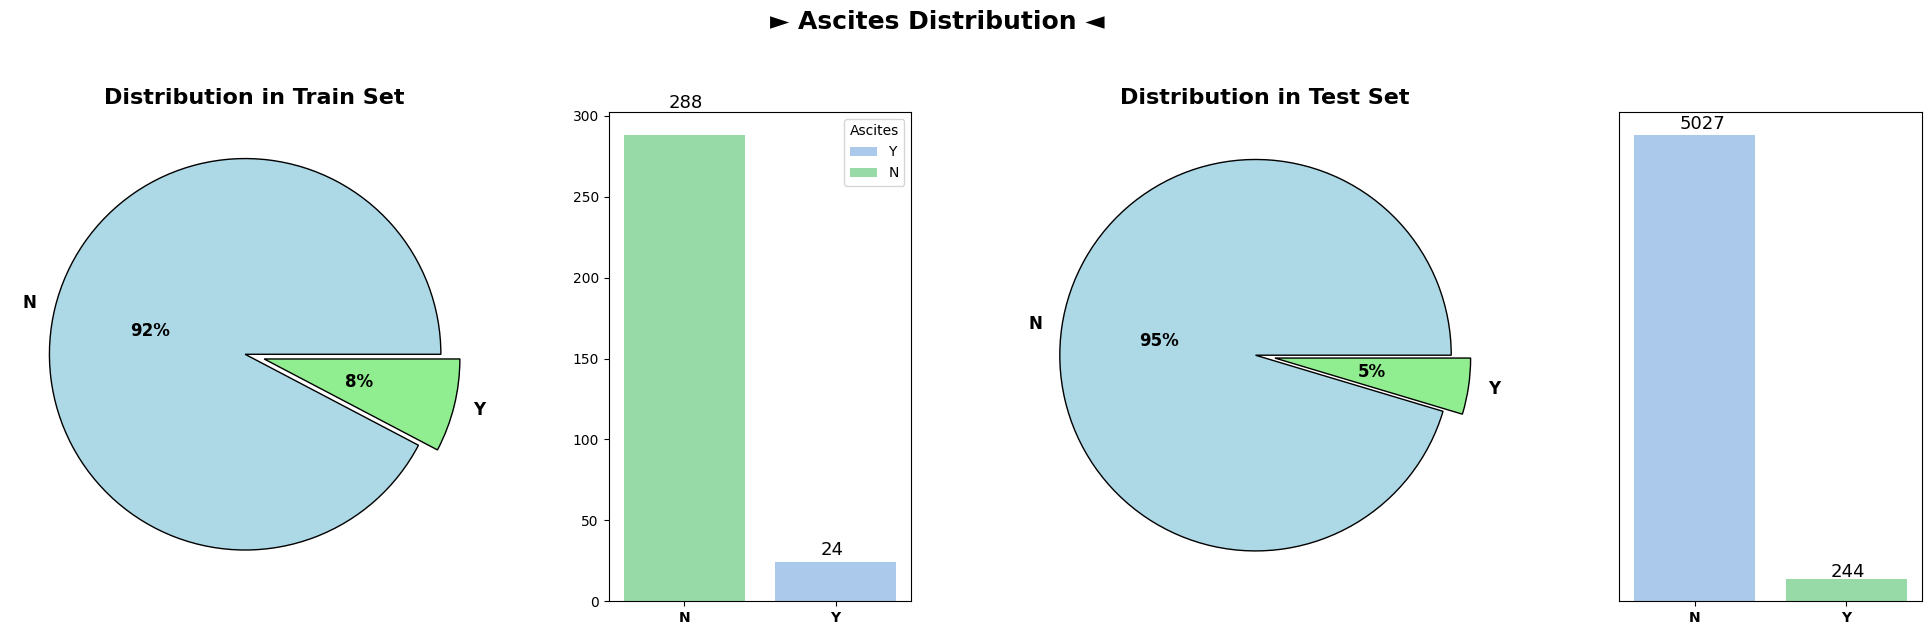

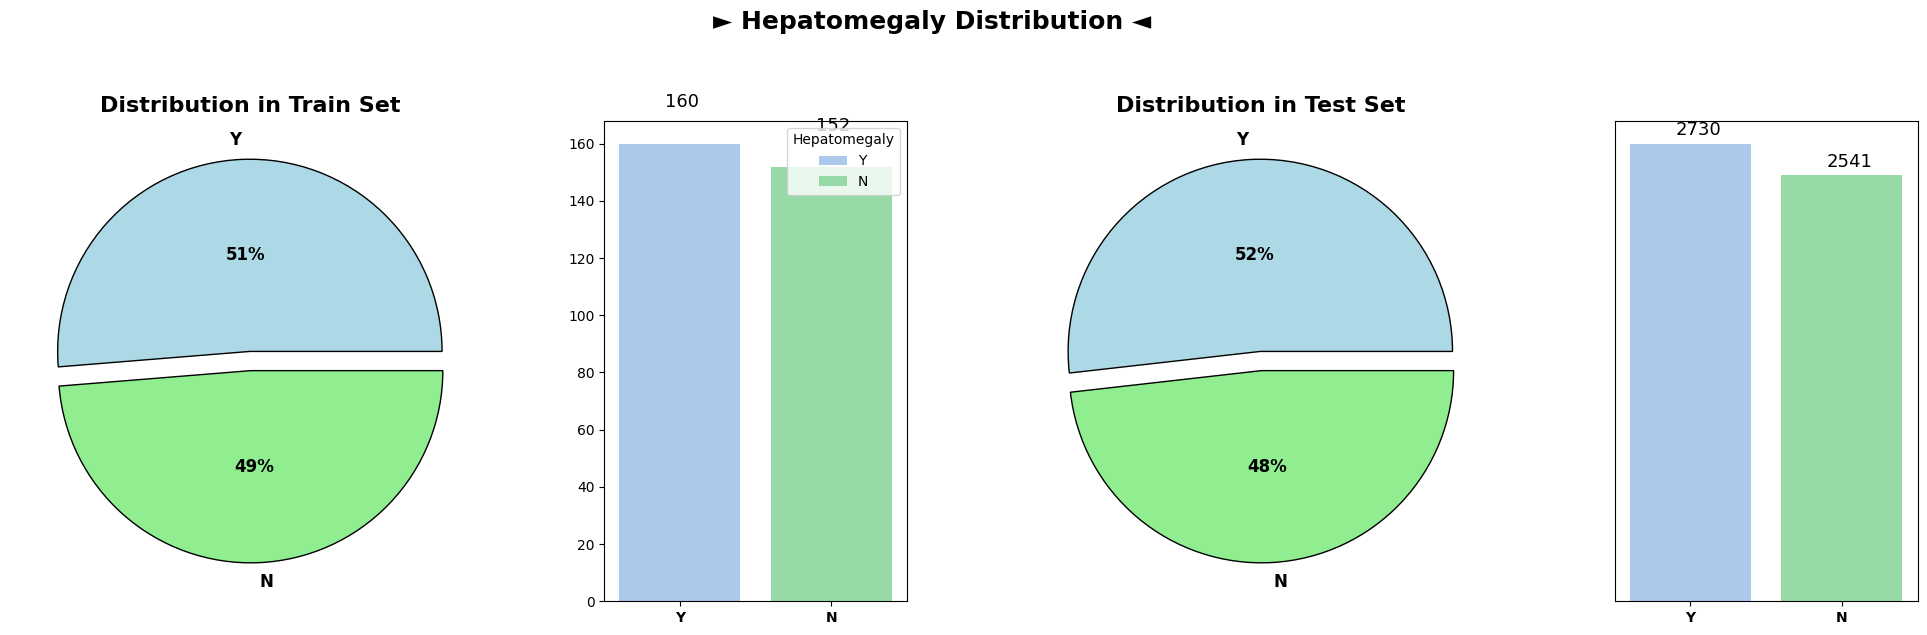

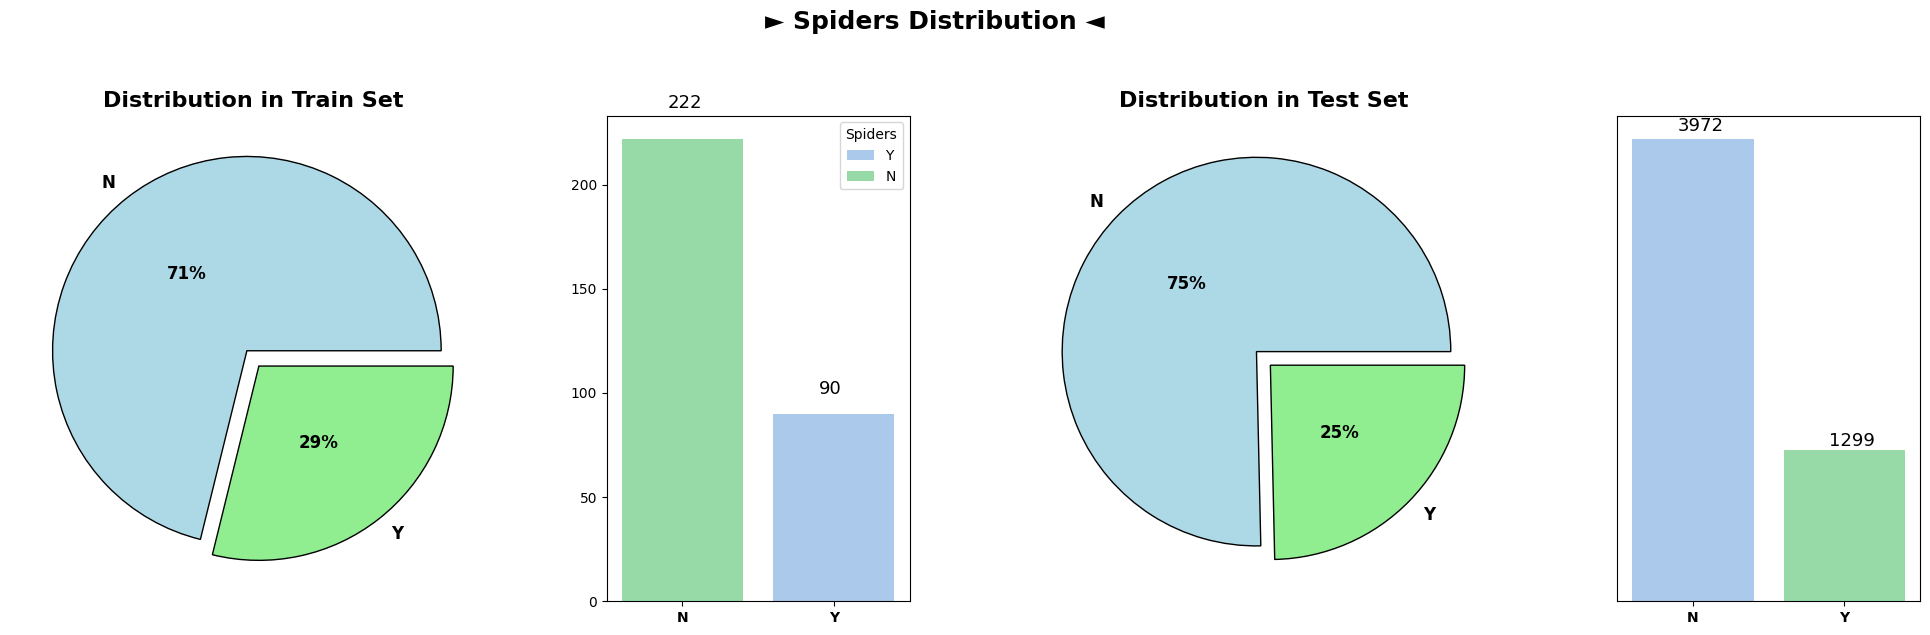

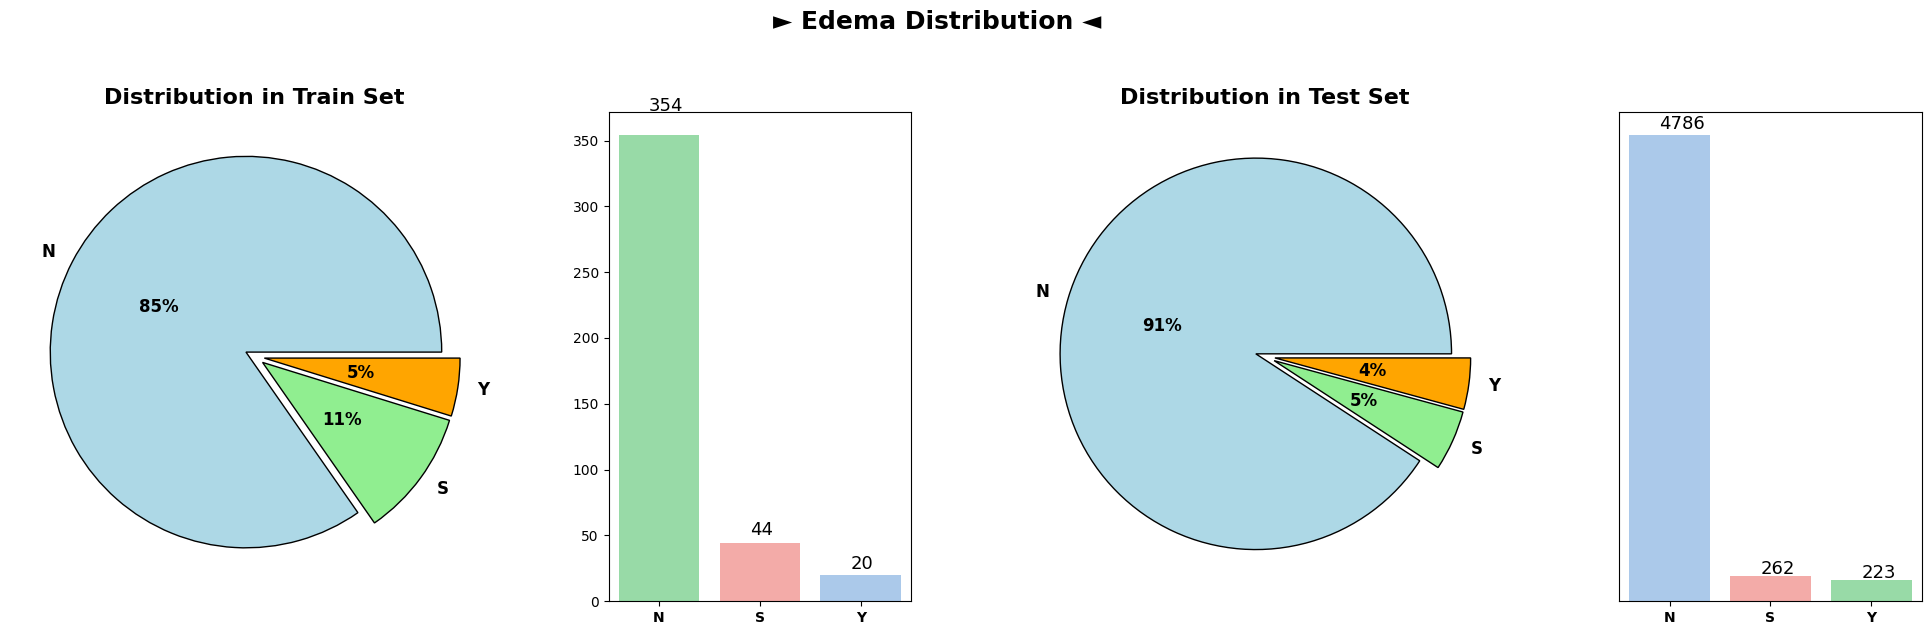

In [7]:
for cat_col in cat_cols:
    plot_target(data=data,
                test_df=test_df, 
                col=cat_col, 
                title=cat_col, 
                pie_colors=['lightblue', 'lightgreen', 'orange'])

Analysis of categorical variable distributions across both the train and test datasets demonstrated highly similar distributions for all categorical columns. These columns, encompassing attributes such as 'Drug,' 'Ascites,' 'Hepatomegaly,' 'Spiders,' 'Edema,' and others, showcased consistent patterns across both datasets.

The similarity in distributions suggests that the categorical variables exhibit consistent trends and distributions between the train and test datasets. This consistency is vital when deploying machine learning models trained on the train dataset to make predictions on unseen test data, ensuring that the model generalizes well to new, unseen observations.

Overall, the plots depicting categorical variable distributions across train and test datasets reveal remarkable coherence, implying a uniform representation of categorical attributes between the datasets.

## Data Preprocessing

### One-Hot Encoding and Data Preparation

#### One-Hot Encoding Categorical Variables
To facilitate the utilization of categorical variables in machine learning models, a process known as one-hot encoding was applied to the categorical columns present in the primary biliary cirrhosis (PBC) dataset.

In [8]:
data_cat = pd.get_dummies(data, columns=cat_cols, drop_first=True, dtype=int)

The `pd.get_dummies()` function from the Pandas library was used to convert categorical variables into numerical representations suitable for model training. This process expanded the categorical columns into binary columns, creating new binary features for each category within the original categorical variables. The `drop_first=True` parameter was employed to drop the first level of each categorical variable to prevent multicollinearity in the dataset, reducing the risk of introducing redundant information.

#### Feature-Target Splitting
Following the one-hot encoding, the dataset was prepared for machine learning modeling by splitting it into feature variables (X) and the target variable (y).

In [9]:
X = data_cat.drop(["Status"], axis=1)
y = data_cat["Status"].map({"C": 0, "CL": 1, "D": 2}).to_numpy().reshape((-1,))

- **Feature Variables (X):** The feature variables (X) were derived by excluding the 'Status' column, which serves as the target variable for prediction. These feature variables encompass the encoded categorical attributes and numerical features, ready to be used for training predictive models.

- **Target Variable (y):** The 'Status' column was transformed into numerical labels representing the classes 'C', 'CL', and 'D'. This transformation was performed using the `map()` function to assign numerical values (0, 1, 2) to the respective classes. The resulting 'y' variable constitutes the target labels for training the machine learning models, enabling the models to learn and predict the patient statuses based on the provided features.

This process of encoding categorical variables and preparing the feature-target split lays the groundwork for subsequent model training and evaluation tasks within the predictive modeling pipeline.

### Scaling using RobustScaler

In the realm of data preprocessing, scaling plays a pivotal role in standardizing numerical features, ensuring a level playing field for different attributes that might have varying scales and distributions. For this dataset concerning primary biliary cirrhosis (PBC), employing the RobustScaler technique proves advantageous due to its robustness against outliers.

#### RobustScaler Explanation:
RobustScaler is a scaling technique that utilizes robust statistics to scale features. It operates by centering and scaling data based on the interquartile range (IQR). Unlike standard scaling methods (e.g., MinMaxScaler, StandardScaler), RobustScaler relies on the median and the IQR, making it less sensitive to outliers. It scales features by subtracting the median and then dividing by the IQR, effectively reducing the influence of outliers on the scaling process.

#### Application of RobustScaler:
In the context of the PBC dataset, several numerical attributes such as bilirubin, cholesterol, copper, alkaline phosphatase, SGOT, triglycerides, platelets, prothrombin, and others might exhibit potential outliers due to variations in patient conditions or laboratory measurements. Applying RobustScaler to these features can help normalize their scales, mitigating the impact of outliers and ensuring that the machine learning models are less influenced by extreme values.

In [10]:
from sklearn.preprocessing import RobustScaler

# Extracting numerical columns
num_cols = X.select_dtypes(exclude='object').columns.tolist()

# Initializing RobustScaler
scaler = RobustScaler()

# Scaling numerical features in the train dataset
X[num_cols] = scaler.fit_transform(X[num_cols])


The RobustScaler instance is instantiated and applied to the numerical columns in both the train and test datasets. This process ensures that numerical features are transformed and standardized using robust statistics, contributing to improved model performance and stability.

### Handling Missing Values: KNNImputer

Missing values are a common occurrence in datasets and necessitate careful handling to ensure the integrity and effectiveness of machine learning models. In the context of the primary biliary cirrhosis (PBC) dataset, several columns exhibit missing values across different attributes, requiring an effective strategy for imputation.

#### KNNImputer Explanation:
KNNImputer is an imputation technique that leverages the concept of k-nearest neighbors to estimate and fill missing values in a dataset. This imputer calculates the missing values based on the values of neighboring data points (samples) in the dataset. It identifies the k nearest neighbors of each sample with missing features and imputes the missing values by taking the average (or another user-defined function) of those neighbors' values for the specific feature.

#### Application of KNNImputer:
Given the complexity and diversity of patient-related attributes in the PBC dataset, utilizing KNNImputer proves beneficial. It accounts for the relationships and similarities between samples, allowing for more informed imputation of missing values. By considering the nearest neighbors, KNNImputer provides a robust strategy for imputing missing values in a dataset with complex patterns and diverse patient profiles.

In [11]:
from sklearn.impute import KNNImputer

# Initializing KNNImputer with the desired number of neighbors (n_neighbors)
imputer = KNNImputer(n_neighbors=5)

# Imputing missing values in the train dataset
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


The KNNImputer instance is initialized with the desired number of neighbors (e.g., 5) and applied to impute missing values in both the train and test datasets. This method leverages the similarities between samples to estimate and fill missing values in the dataset effectively.

## Exploratory Data Analysis (EDA)

### Correlation Analysis

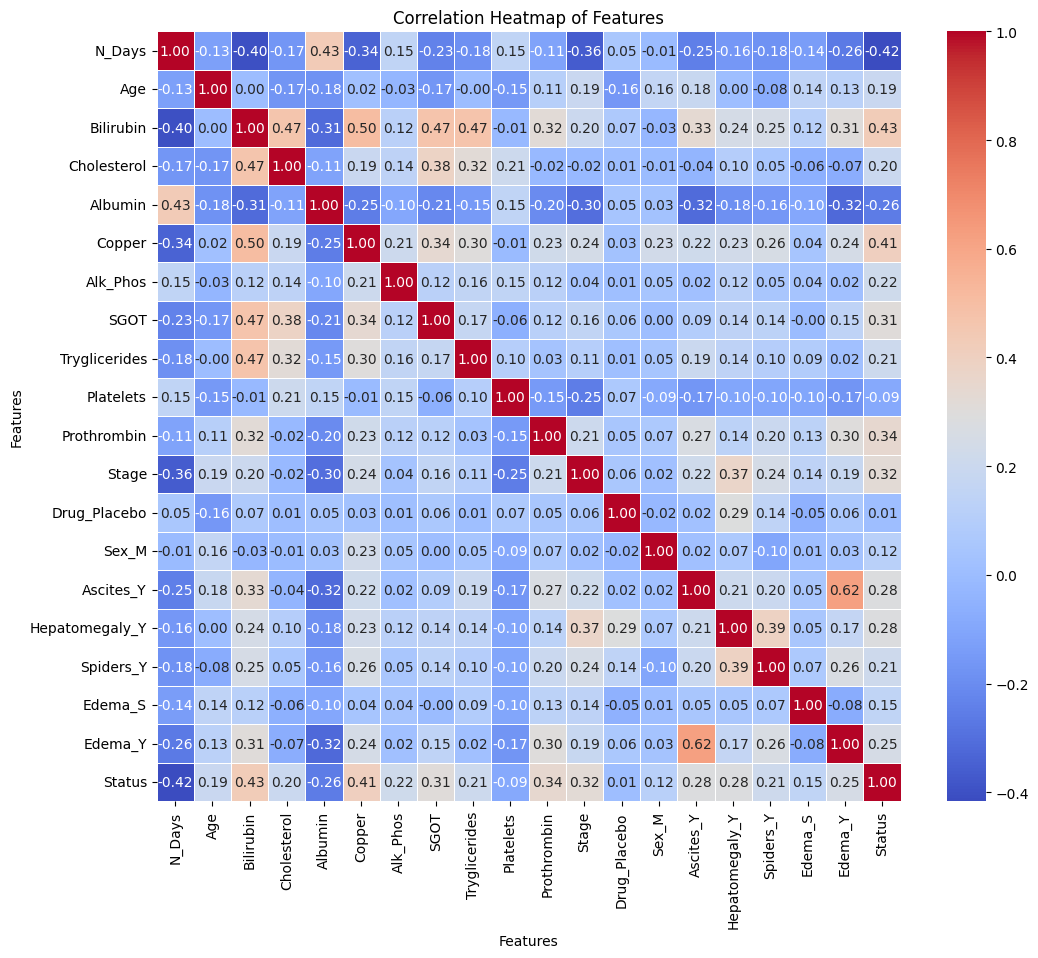

In [12]:
# Calculating correlation matrix
correlation_matrix = pd.concat([X_imputed, pd.DataFrame(y, columns=["Status"])], axis=1).corr()

# Plotting a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

The correlation heatmap above displays the pairwise correlations between the features present in the Primary Biliary Cirrhosis (PBC) dataset after preprocessing and imputation. Each cell in the heatmap represents the correlation coefficient between two variables, ranging from -1 to 1.

**Interpreting the Heatmap:**

- **Positive Correlation:** Values closer to 1 indicate a strong positive relationship, implying that as one variable increases, the other tends to increase as well.
- **Negative Correlation:** Values closer to -1 signify a strong negative relationship, indicating that as one variable increases, the other tends to decrease.
- **Correlation Close to 0:** Values close to 0 suggest a weak or no linear relationship between variables.

**Insights from Correlation Analysis:**

The correlation matrix reveals valuable insights into the relationships between various features and the target variable ('Status') in the Primary Biliary Cirrhosis (PBC) dataset. Here are key observations:

- **Strong Correlations with 'Status':**

  - **Bilirubin (0.43):** Exhibits a moderate positive correlation with 'Status', indicating a considerable association between higher levels of bilirubin and the patient's status.
  - **Albumin (-0.26):** Shows a moderate negative correlation, suggesting that lower levels of albumin might be associated with a deteriorating patient status.
  - **Copper (0.41):** Demonstrates a significant positive correlation, implying a potential relationship between higher copper levels and a positive patient status.

- **Other Significant Correlations:**

  - **SGOT (0.31):** Shows a moderate positive correlation with 'Status', indicating a potential influence on patient status.
  - **Prothrombin (0.34):** Displays a moderate positive correlation, suggesting a possible impact on the patient's status.
  - **Edema_Y (0.25):** Indicates a moderate positive correlation, suggesting a correlation between the presence of edema and patient status.

- **Weak Correlations:**

  - **Age (0.19):** Shows a weak positive correlation with 'Status', suggesting a mild association between age and patient status.
  - **Cholesterol (0.20):** Displays a weak positive correlation with 'Status', indicating a subtle relationship.

- **Inverse Correlation:**

  - **Platelets (-0.09):** Exhibits a weak negative correlation, implying a minor association between platelet count and patient status.

These correlation insights provide a preliminary understanding of potential influential factors in predicting the status of PBC patients. However, correlation doesn't imply causation. Further analysis, such as feature importance determination using machine learning models or domain-specific investigations, is crucial for accurate predictive modeling and clinical interpretations.

## Model Building

### Cross-validation and Train-Test Split


#### Stratified K-Fold Cross-Validation
Cross-validation is a crucial technique used to assess the performance and generalizability of machine learning models. Stratified K-Fold cross-validation, implemented through `StratifiedKFold`, is particularly advantageous when working with classification tasks, maintaining the distribution of the target variable's classes across folds.

In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Initializing Stratified K-Fold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In this code snippet, the `StratifiedKFold` object is created with parameters:
- `n_splits=5`: Divides the dataset into 5 folds for cross-validation.
- `shuffle=True`: Shuffles the data before splitting to ensure randomness.
- `random_state=42`: Sets a random seed for reproducibility.

#### Train-Test Split
The `train_test_split` function partitions the dataset into training and testing sets, facilitating model training and evaluation.

In [14]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=3935, stratify=y)


Here, `train_test_split`:

- `X_imputed` and `y` are the feature and target variables, respectively.
- `test_size=0.2`: Allocates 20% of the data for testing, leaving 80% for training.
- `random_state=3935`: Sets a specific seed for reproducibility in random sampling.
- `stratify=y`: Ensures that the splitting preserves the proportion of classes in the target variable 'y'.

Combining `StratifiedKFold` for cross-validation and `train_test_split` for initial training and testing partitions ensures robust model validation and evaluation, contributing to more reliable model performance estimation.

This approach facilitates both cross-validation to assess model performance across multiple folds and the creation of distinct training and testing sets for initial model training and evaluation.

### Training Multiple LightGBM Models with Cross-Validation

The code snippet demonstrates the training of multiple LightGBM models using `StratifiedKFold` for cross-validation and evaluating their performance.

In [15]:
%%capture

import lightgbm as lgb
from sklearn.metrics import log_loss

# List to store trained LightGBM models
lg_models = []

# Parameters for the LightGBM model
params = {
    'objective': 'multiclass',
    'metric': 'multi_logloss', 
    'max_depth': 15, 
    'min_child_samples': 13, 
    'learning_rate': 0.05285597081335651, 
    'n_estimators': 284, 
    'min_child_weight': 5, 
    'subsample': 0.7717873512945741,
    'colsample_bytree': 0.10012816493265511, 
    'reg_alpha': 0.8767668608061822, 
    'reg_lambda': 0.8705834466355764,
    'random_state': 42,
    'verbose': -1
}

# Training multiple LightGBM models using Stratified K-Fold
for x_idx, val_idx in skf.split(X_train, y_train):
    LGBModel = lgb.LGBMClassifier(**params)
    LGBModel.fit(X_train.iloc[x_idx], y_train[x_idx], eval_set=[(X_train.iloc[val_idx], y_train[val_idx])])
    lg_models.append(LGBModel)

Explanation:

- **`lg_models`:** This list stores trained LightGBM models.
- **`params`:** Represents the hyperparameters configuration for the LightGBM model.
- **`for x_idx, val_idx in skf.split(X_train, y_train):`** Iterates over the folds generated by Stratified K-Fold.
- **`LGBModel.fit()`:** Trains the LightGBM model on the training data using `fit()` method. The `eval_set` parameter enables tracking model performance on the validation set during training.
- **`lg_score`:** Initializes a variable to store the cumulative log loss across all models.
- **`for i, LGBModel in enumerate(lg_models):`** Loops through the trained models and evaluates each on the test set using `log_loss()` function. It prints the log loss for each model.

In [16]:

# Evaluating the models on the test set
for i, LGBModel in enumerate(lg_models):
    y_pred = LGBModel.predict_proba(X_test)
    print(f'Model {i+1} Log Loss: ', log_loss(y_test, y_pred))

Model 1 Log Loss:  0.7048019339936583
Model 2 Log Loss:  0.6668449298711905
Model 3 Log Loss:  0.6558914179839223
Model 4 Log Loss:  0.67101782116581
Model 5 Log Loss:  0.7453997236011517


The log loss values obtained from the five LightGBM models showcase varying predictive performance. Models 3 and 2 exhibit relatively lower log loss values of 0.656 and 0.667, respectively, suggesting higher predictive accuracy compared to other models. Conversely, Model 5 presents the highest log loss of 0.745, indicating comparatively weaker predictive performance. These divergent log loss values underline differing levels of accuracy and precision across the models, suggesting a need for deeper investigation into the features and parameters influencing their respective performances.

### Training Multiple XGBoost Models with Cross-Validation

The following code trains multiple XGBoost models using `StratifiedKFold` for cross-validation and evaluates their performance using log loss.

In [17]:
%%capture

import xgboost as xgb

# List to store trained XGBoost models
xgb_models = []

# Parameters for the XGBoost model
params ={
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'n_estimators': 397,
    'max_depth': 44,
    'min_child_weight': 4.8419409783368215,
    'learning_rate': 0.049792103525168455,
    'subsample': 0.7847543051746505,
    'gamma': 0.4377096783729759,
    'colsample_bytree': 0.22414960640035653,
    'colsample_bylevel': 0.8173336142032213,
    'colsample_bynode': 0.9468109886478254,
    'random_state': 42,
    'verbose': -1
}

# Training multiple XGBoost models using Stratified K-Fold
for x_idx, val_idx in skf.split(X_train, y_train):
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_train.iloc[x_idx], y_train[x_idx], eval_set=[(X_train.iloc[val_idx], y_train[val_idx])], verbose=0)
    xgb_models.append(xgb_model)


Explanation:

- **`xgb_models`:** This list stores trained XGBoost models.
- **`params`:** Represents the hyperparameters configuration for the XGBoost model.
- **`for x_idx, val_idx in skf.split(X_train, y_train):`** Iterates over the folds generated by Stratified K-Fold.
- **`xgb_model.fit()`:** Trains the XGBoost model on the training data using `fit()` method. The `eval_set` parameter enables tracking model performance on the validation set during training.
- **`xgb_score`:** Initializes a variable to store the cumulative log loss across all models.
- **`for i, xgb_model in enumerate(xgb_models):`** Loops through the trained models and evaluates each on the test set using `log_loss()` function. It prints the log loss for each model.

In [18]:
# Evaluating the models on the test set
for i, xgb_model in enumerate(xgb_models):
    y_pred = xgb_model.predict_proba(X_test)
    print(f'Model {i+1} Log Loss: ', log_loss(y_test, y_pred))

Model 1 Log Loss:  0.6815692319610926
Model 2 Log Loss:  0.6508326753005506
Model 3 Log Loss:  0.6568453212687483
Model 4 Log Loss:  0.6553995987447889
Model 5 Log Loss:  0.6723285733325526


The obtained log loss values from the five XGBoost models reveal varying performance levels. Models 2 and 3 exhibit relatively lower log loss values of approximately 0.651 and 0.657, respectively, indicating higher predictive accuracy compared to the other models. Conversely, Models 1, 4, and 5 present slightly higher log loss values, suggesting relatively weaker predictive performance. These diverse log loss scores indicate differing levels of predictive accuracy across the trained XGBoost models, highlighting potential variations in their learned patterns and the need for further investigation into their individual characteristics to improve overall model performance.

### Training CatBoost Models and Evaluating Performance

The following code trains multiple CatBoost models using Stratified K-Fold cross-validation and assesses their performance using log loss:

In [19]:
from catboost import CatBoostClassifier

# List to store trained CatBoost models
cat_models = []

# Parameters for the CatBoost model
params = {
    'logging_level': 'Silent', 
    'random_seed': 42, 
    'iterations': 593,
    'depth': 43,
    'min_data_in_leaf': 42,
    'learning_rate': 0.023456006693305914,
    'subsample': 0.8018560299887264,
    'random_strength': 0.04176274518438195,
    'grow_policy': 'Lossguide',
    'bootstrap_type' : 'Bernoulli',
    # 'bootstrap_type': 'Poisson'
}

# Training multiple CatBoost models using Stratified K-Fold
for x_idx, val_idx in skf.split(X_train, y_train):
    cat_model = CatBoostClassifier(**params)
    cat_model.fit(X=X_train.iloc[x_idx], y=y_train[x_idx], eval_set=[(X_train.iloc[val_idx], y_train[val_idx])])
    cat_models.append(cat_model)

Explanation:

- **`cat_models`:** This list stores trained CatBoost models.
- **`params`:** Represents the hyperparameters configuration for the CatBoost model.
- **`for x_idx, val_idx in skf.split(X_train, y_train):`** Iterates over the folds generated by Stratified K-Fold.
- **`CatBoostClassifier.fit()`:** Trains the CatBoost model on the training data using `fit()` method. The `eval_set` parameter enables tracking model performance on the validation set during training.
- **`cat_score`:** Initializes a variable to store the cumulative log loss across all CatBoost models.
- **`for i, cat_model in enumerate(cat_models):`** Loops through the trained models and evaluates each on the test set using `log_loss()` function. It prints the log loss for each model.

This section demonstrates the training of multiple CatBoost models using cross-validation and subsequent evaluation of their performance using log loss on the test set. The log loss metric measures the accuracy of the model's predicted probabilities compared to the true labels. Adjustments to hyperparameters or model evaluation strategies can further refine model performance.

In [20]:

# Evaluating the models on the test set
for i, cat_model in enumerate(cat_models):
    y_pred = cat_model.predict_proba(X_test)
    print(f'Model {i+1} Log Loss: ', log_loss(y_test, y_pred))

Model 1 Log Loss:  0.6411249325455535
Model 2 Log Loss:  0.6347449226539893
Model 3 Log Loss:  0.6667271272394244
Model 4 Log Loss:  0.6372961395542406
Model 5 Log Loss:  0.6731041546602471


The log loss values obtained from the five CatBoost models suggest varying degrees of predictive performance. Model 2 showcases the lowest log loss of 0.635, indicating higher predictive accuracy compared to the other models. Conversely, Model 5 exhibits the highest log loss of 0.673, signifying relatively weaker predictive performance. These divergent log loss values signify differing levels of precision across the models, emphasizing the need for deeper exploration into the models' attributes, such as hyperparameters or feature importance, to ascertain the factors influencing their respective performances.

### Elevating Predictive Power with Stacked Ensemble Model

Now, let's explore the construction of a more robust predictive model through a technique called **Stacking**. Stacking involves combining multiple machine learning models, leveraging their diverse strengths to enhance overall predictive performance. In this section, we'll build a Stacked Ensemble Model using an MLPClassifier as the final estimator.

#### Model Configuration:
- **MLPClassifier:** A Multi-layer Perceptron (MLP) neural network with 64 and 32 neurons in its hidden layers, employing the 'relu' activation function, 'adam' solver, and various hyperparameters for optimization.
  
#### StackingClassifier Configuration:
- **Estimators:** The StackingClassifier utilizes predictions from previously trained models, including LGBM, XGBoost, and CatBoost.
- **Final Estimator:** The final estimator, an MLPClassifier, aggregates predictions from the base models.
- **Cross-Validation (cv):** Employing Stratified K-Fold cross-validation ensures robustness in model evaluation and performance estimation.

#### Implementation:

In [21]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier

# Initializing an MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=1000,
    random_state=42,
    activation='relu',
    learning_rate_init=0.001,
    solver='adam',
    validation_fraction=0.1,
    momentum=0.9,
    nesterovs_momentum=True,
    batch_size=32,
    beta_1=0.9,
    beta_2=0.999
)

# Creating a StackingClassifier
stacking_model = StackingClassifier(
    estimators=[
        ('LGBM', LGBModel),
        ('XGB', xgb_model),
        ('CAT', cat_model)
    ],
    final_estimator=mlp,
    cv=skf
)

In [22]:
%%capture
# Fitting the StackingClassifier on the training data
stacking_model.fit(X_train, y_train)

#### Explanation:
The StackingClassifier combines predictions from diverse base models (LGBM, XGBoost, CatBoost) and utilizes an MLPClassifier as the final layer to learn and make predictions based on the diverse outputs. This stacking technique aims to improve predictive accuracy by leveraging the collective knowledge of multiple models, potentially capturing a more nuanced understanding of the data and enhancing overall performance on unseen test data. The model fitting is conducted using the training data, and subsequent predictions are generated for evaluation and assessment of the ensemble model's effectiveness.

## Model Evaluation

### Evaluating Stacked Ensemble Model Performance

#### Model Evaluation Metrics:

To assess the performance of the Stacked Ensemble Model, several evaluation metrics are computed using the model's predictions on the test dataset.

#### Evaluation Metrics Computed:
- **Log Loss:** A measure of uncertainty in the model's predictions.
- **Accuracy:** Proportion of correctly predicted outcomes.
- **Precision:** Measure of the model's exactness in predicting each class.
- **Recall:** Measure of the model's completeness in capturing each class.
- **F1 Score:** Harmonic mean of precision and recall, providing a balanced assessment.

#### Confusion Matrix and Classification Report:
- **Confusion Matrix:** Tabulation of actual vs. predicted class counts, aiding in understanding misclassifications.
- **Classification Report:** Detailed summary showcasing precision, recall, F1 score, and support for each class.

#### Evaluation Process and Metrics Computation:

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the model on the test data
y_pred = stacking_model.predict_proba(X_test)
lloss = log_loss(y_test, y_pred)
print(f"Log loss on test data: {lloss}")

# Round probabilities to get hard predictions
y_pred_hard = np.argmax(y_pred, axis=1)
y_test_hard = y_test

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_hard, y_pred_hard)
precision = precision_score(y_test_hard, y_pred_hard, average='weighted')
recall = recall_score(y_test_hard, y_pred_hard, average='weighted')
f1 = f1_score(y_test_hard, y_pred_hard, average='weighted')
conf_matrix = confusion_matrix(y_test_hard, y_pred_hard)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test_hard, y_pred_hard))
print("\nConfusion Matrix:")
print(conf_matrix)

Log loss on test data: 0.6094441313988819
Accuracy: 0.7500
Precision: 0.7648
Recall: 0.7500
F1 Score: 0.7345

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        47
           1       1.00      0.20      0.33         5
           2       0.77      0.62      0.69        32

    accuracy                           0.75        84
   macro avg       0.84      0.57      0.61        84
weighted avg       0.76      0.75      0.73        84


Confusion Matrix:
[[42  0  5]
 [ 3  1  1]
 [12  0 20]]


### Analysis of Stacked Ensemble Model Performance

The evaluation metrics obtained from the Stacked Ensemble Model's predictions on the test dataset are instrumental in understanding its performance.

#### Insights from Evaluation Metrics:

- **Log Loss:** The model's log loss of 0.6094 indicates moderate uncertainty in its predictions, with lower values being desirable.

- **Accuracy (0.7500):** The model accurately predicted 75% of instances in the test dataset.

- **Precision (0.7648):** The precision score of 0.7648 suggests that when the model predicts a certain class, it is correct approximately 76.48% of the time on average across all classes.

- **Recall (0.7500):** The recall score of 0.7500 indicates that the model identified 75% of all actual instances for each class.

- **F1 Score (0.7345):** The F1 score, at 0.7345, demonstrates the harmonic mean of precision and recall, reflecting the model's balance between these metrics.

#### Detailed Class-wise Performance:

The classification report and confusion matrix offer insights into the model's performance for each class:

##### Class 0:
- **Precision (0.74):** The model achieved 74% precision in correctly identifying instances of Class 0.
- **Recall (0.89):** It captured 89% of all actual instances of Class 0.
- **F1 Score (0.81):** The harmonic mean of precision and recall for Class 0 is 0.81.

##### Class 1:
- **Precision (1.00):** Perfect precision was observed for Class 1, albeit from a relatively small number of instances.
- **Recall (0.20):** The recall score for Class 1 is lower, capturing only 20% of all actual instances.

##### Class 2:
- **Precision (0.77):** The model exhibited 77% precision in predicting instances of Class 2.
- **Recall (0.62):** It captured 62% of all actual instances of Class 2.
- **F1 Score (0.69):** The F1 score for Class 2, at 0.69, signifies a balance between precision and recall.

#### Overall Summary:

The model performed relatively well in identifying instances of Class 0, showcasing strong precision and recall. However, for Classes 1 and 2, while precision was moderate, recall varied, indicating room for improvement, especially in identifying Class 1 instances.

The confusion matrix illustrates specific misclassifications between classes, aiding in understanding where the model struggles and excels. This analysis helps identify the model's strengths and areas that require further refinement for more robust predictions.

## Conclusion and Future Steps

### Conclusion

The Stacked Ensemble Model exhibited promising performance in predicting classes across the dataset. It achieved an overall accuracy of 75%, demonstrating a fair ability to classify instances into their respective classes. However, a closer examination reveals areas for enhancement.

### Key Findings

- **Performance Variability:** The model showcased strong precision and recall for Class 0, while Classes 1 and 2 demonstrated varying results, particularly lower recall in Class 1.
- **Log Loss:** The moderate log loss of 0.6094 suggests room for improvement in reducing prediction uncertainty.

### Insights for Improvement

1. **Class Imbalance Handling:** Addressing class imbalances, especially for Class 1, could enhance the model's ability to recognize these instances more accurately.
  
2. **Model Tuning:** Further optimization of hyperparameters, especially related to individual base learners and the final stacked model, may refine its predictive capabilities.

3. **Feature Engineering:** Exploring additional features or engineering existing ones might offer a deeper understanding of the data, potentially leading to improved model performance.

### Future Steps

1. **Fine-Tuning Hyperparameters:** Conduct more extensive hyperparameter tuning to seek better combinations that enhance the model's performance across all classes.

2. **Feature Enhancement:** Engage in thorough feature analysis and engineering to uncover more informative features or transformations that can contribute positively to the model's predictive power.

3. **Ensemble Diversification:** Experiment with diverse base models or ensemble techniques to enhance the model's diversity and, consequently, its overall predictive ability.

4. **Robust Validation:** Consider employing additional cross-validation strategies or validation techniques to validate the model's consistency and generalization.

5. **Model Interpretation:** Explore methods to interpret the model's decisions, aiding in understanding its behavior and potentially identifying areas for improvement.

### Final Note

Continued refinement and exploration of advanced techniques are vital for enhancing the model's predictive performance. By addressing the identified areas for improvement and leveraging sophisticated methodologies, the model can evolve into a more robust and accurate predictor, proving invaluable in various real-world applications.